In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('prices-split-adjusted.csv')
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [6]:
data = data.loc[(data['symbol'] == 'AAPL')]
data = data.drop(columns=['symbol'])
data = data[['date','open','close','low','volume','high']]
data

,date,open,close,low,volume,high
254,2010-01-04,30.490000,30.572857,30.340000,123432400.0,30.642857
721,2010-01-05,30.657143,30.625713,30.464285,150476200.0,30.798571
1189,2010-01-06,30.625713,30.138571,30.107143,138040000.0,30.747143
1657,2010-01-07,30.250000,30.082857,29.864286,119282800.0,30.285715
2125,2010-01-08,30.042856,30.282858,29.865715,111902700.0,30.285715
...,...,...,...,...,...,...
848767,2016-12-23,115.589996,116.519997,115.589996,14249500.0,116.519997
849267,2016-12-27,116.519997,117.260002,116.489998,18296900.0,117.800003
849767,2016-12-28,117.519997,116.760002,116.199997,20905900.0,118.019997
850267,2016-12-29,116.449997,116.730003,116.400002,15039500.0,117.110001


In [7]:
data.shape

(1762, 6)

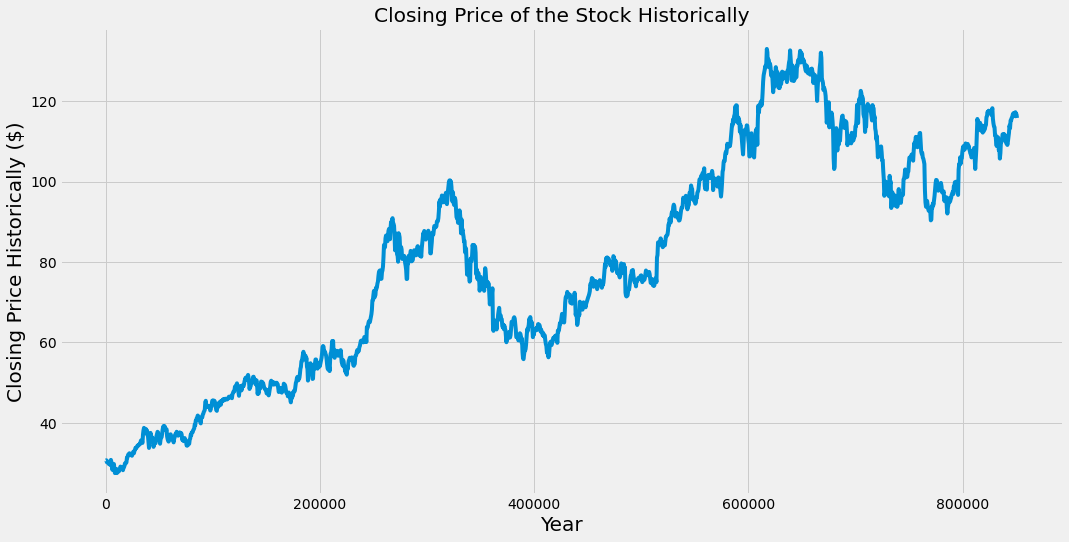

In [8]:
plt.figure(figsize=(16,8))
plt.title('Closing Price of the Stock Historically')
plt.plot(data['close'])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Closing Price Historically ($)', fontsize=20)
plt.show()

In [9]:
data = data.filter(['close'])
dataset = data.values

#Find out the number of rows that are present in this dataset in order to train our model.
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1410

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02971784],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84616011],
       [0.84587593],
       [0.83725556]])

In [11]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for j in range(60, len(train_data)):
    x_train.append(train_data[j-60:j,0])
    y_train.append(train_data[j,0])
    if j<=60:
        print(x_train)
        print(y_train)
        print()

[array([2.97178362e-02, 3.02185399e-02, 2.56038867e-02, 2.50761176e-02,
       2.69707045e-02, 2.44400840e-02, 2.12057623e-02, 2.51708493e-02,
       2.35198553e-02, 1.87834049e-02, 3.11117019e-02, 2.66323798e-02,
       2.16794006e-02, 7.71364371e-03, 1.49130510e-02, 1.87969390e-02,
       2.14222912e-02, 9.79767512e-03, 1.35327151e-05, 3.62676096e-03,
       5.15595645e-03, 9.71647747e-03, 0.00000000e+00, 4.61465324e-03,
       2.80126397e-03, 5.60254553e-03, 4.15454904e-03, 8.95864541e-03,
       1.12727384e-02, 1.53596225e-02, 1.42093512e-02, 1.47235876e-02,
       1.30184627e-02, 1.13268706e-02, 6.77988365e-03, 1.16516639e-02,
       1.34650532e-02, 1.70106151e-02, 2.29244212e-02, 2.27349578e-02,
       2.33845254e-02, 2.52520469e-02, 3.64030071e-02, 3.65789175e-02,
       4.19108209e-02, 4.43737602e-02, 4.52669398e-02, 4.67555357e-02,
       4.30204928e-02, 4.38459898e-02, 4.33994183e-02, 4.41166508e-02,
       4.08687964e-02, 4.42519807e-02, 4.91372761e-02, 5.05040939e-02,
     

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)



In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1350, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')



In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1350/1350 [==============================] - 38s 26ms/step - loss: 0.0085


In [17]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for j in range(60, len(test_data)):
    x_test.append(test_data[j-60:j, 0])
    

In [18]:
x_test = np.array(x_test)

In [19]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



In [21]:
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

7.238327583368474

<ipython-input-22-c4f5f48149f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions'] = predictions


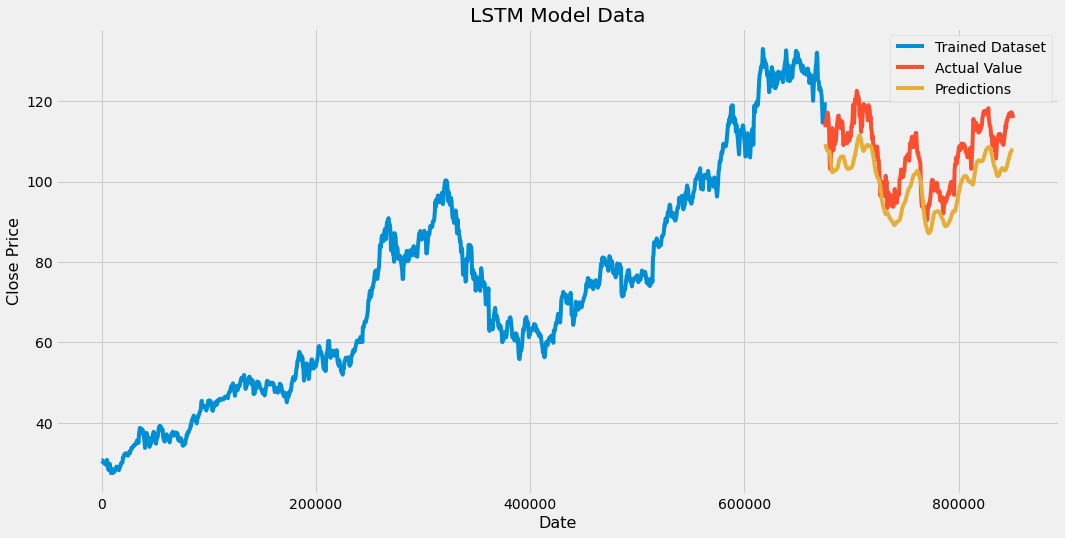

In [22]:
train = data[:training_data_len]
val = data[training_data_len:]
val['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM Model Data')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['close'])
plt.plot(val[['close', 'Predictions']])
plt.legend(['Trained Dataset', 'Actual Value', 'Predictions'])
plt.show()

In [23]:
val

,close,Predictions
675609,113.489998,109.314690
676106,115.239998,108.743256
676603,115.150002,108.282417
677100,115.959999,107.907173
677597,117.160004,107.674210
...,...,...
848767,116.519997,107.375526
849267,117.260002,107.605125
849767,116.760002,107.821533
850267,116.730003,107.972397


In [25]:
new_data = pd.read_csv('prices-split-adjusted.csv')
new_data = data.filter(['close'])
last_60_days = new_data[-60:].values
last_60_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print('The predicted price of the final value of the dataset', predicted_price)

The predicted price of the final value of the dataset [[108.06777]]


In [26]:
new_data.tail(1)

,close
850767,115.82


In [27]:
#check predicted values
predictions = model.predict(x_test) 
#Undo scaling
predictions = scaler.inverse_transform(predictions)

#Calculate RMSE score
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.896005053864919

In [29]:
neww_data = pd.read_csv('prices-split-adjusted.csv')

In [30]:
val.describe()

,close,Predictions
count,352.000000,352.000000
mean,107.177727,99.939400
std,7.974379,6.699620
min,90.339996,87.134506
25%,99.595001,92.666061
50%,108.824997,101.561161
75%,113.555002,105.217232
max,122.570000,111.468346


In [31]:
x = val.close.mean()
y = val.Predictions.mean()
Accuracy = x/y*100
print("The accuracy of the model is " , Accuracy)

The accuracy of the model is  107.24271660326717
